### Importing Libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### Reading csv

In [2]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [16]:
X=df.drop('Churn',axis=1)
X

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [17]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

##### Train Test Split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 1)

In [22]:
methodDict = {}
import time
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, classification_report
from sklearn.model_selection import cross_val_score

def EvaluateModel(model, y_test, y_pred, plot=False):

    # Confusion matrix
    confusion = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

    # Training time start
    start_time = time.time()

    # visualize Confusion Matrix
    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Training time end
    end_time = time.time()
    training_time = end_time - start_time

    print('Training Time:', training_time, 'seconds')

    # Classification Accuracy:
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Classification Accuracy:', accuracy)

    # Classification Error:
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred))

    # Classification Report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Thêm accuracy vào methodDict với tên mô hình là khóa
    model_name = model.__class__.__name__
    methodDict[model_name] = {'accuracy': accuracy * 100, 'training_time': training_time}

In [23]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 2)

def RandomSearch(model, param_dist):
  reg_random = RandomizedSearchCV(estimator=model,
                    param_distributions=param_dist,
                    n_iter=10,
                    cv=kf,
                    n_jobs=8,
                    scoring='accuracy',
                    random_state =2)
  reg_random.fit(X_train,y_train)
  y_pred = reg_random.predict(X_test)
  print('RandomSearch. Best Score: ', reg_random.best_score_)
  print('RandomSearch. Best Params: ', reg_random.best_params_)
  accuracy_score = EvaluateModel(model, y_test, y_pred, plot =True)

#### Decision Tree Classifier

Decision-Tree
RandomSearch. Best Score:  0.7921777777777778
RandomSearch. Best Params:  {'min_samples_leaf': 2, 'max_depth': 4, 'criterion': 'gini'}


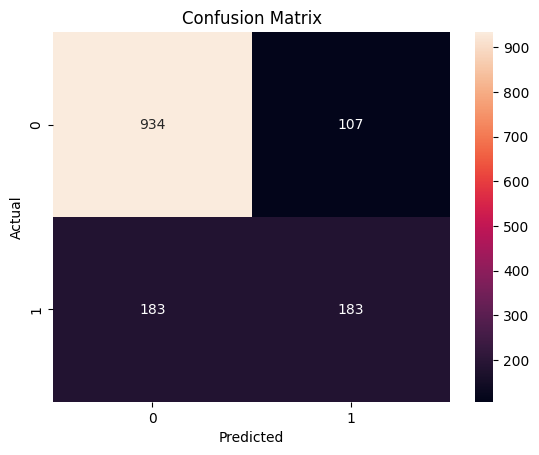

Training Time: 1.1047804355621338 seconds
Classification Accuracy: 0.7938877043354655
Classification Error: 0.20611229566453448
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.63      0.50      0.56       366

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



In [25]:
model_2 = DecisionTreeClassifier()
param_dist = {
    'max_depth': [4, 6, 8, 10, 12],  # Đưa ra danh sách các giá trị max_depth bạn muốn thử
    'min_samples_leaf': [2, 4, 6, 8, 10],  # Tương tự, đưa ra danh sách các giá trị min_samples_leaf
    'criterion': ['gini', 'entropy']  # Danh sách các giá trị cho criterion
}
print('Decision-Tree')
RandomSearch(model_2, param_dist)

###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

###### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [60]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)


In [61]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [62]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",max_depth=4, min_samples_leaf=2)

In [63]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9272419627749577
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       518
           1       0.93      0.95      0.94       664

    accuracy                           0.93      1182
   macro avg       0.93      0.92      0.93      1182
weighted avg       0.93      0.93      0.93      1182



In [64]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[468  50]
 [ 36 628]]


###### Now we can see quite better results, i.e. Accuracy: 90 %, and a very good recall, precision & f1 score for minority class.

###### Let's try with some other classifier.

#### Random Forest Classifier

Random Forest
RandomSearch. Best Score:  0.8021333333333335
RandomSearch. Best Params:  {'min_samples_leaf': 6, 'max_depth': 8, 'criterion': 'gini'}


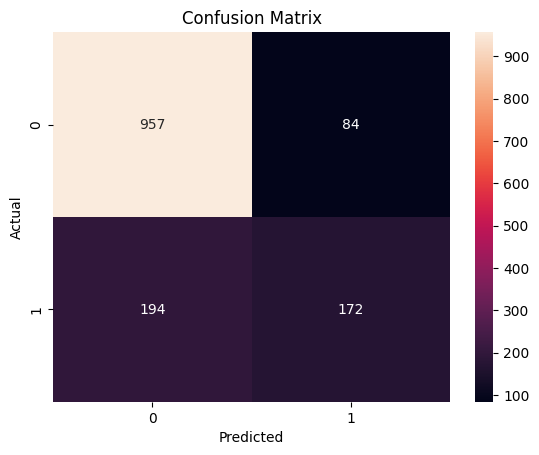

Training Time: 0.2860550880432129 seconds
Classification Accuracy: 0.8024164889836531
Classification Error: 0.19758351101634686
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1041
           1       0.67      0.47      0.55       366

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [43]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
param_dist = {'max_depth': list(range(1, 9)),
              "min_samples_leaf": list(range(1, 9)),
              "criterion": ["gini", "entropy"]}


print('Random Forest')

RandomSearch(model_rf, param_dist)


In [65]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,y)

In [66]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [70]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=8, min_samples_leaf=6)

In [71]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=8, min_samples_leaf=6)

In [72]:
model_rf_smote.fit(xr_train1,yr_train1)
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9592529711375212
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       531
           1       0.96      0.97      0.96       647

    accuracy                           0.96      1178
   macro avg       0.96      0.96      0.96      1178
weighted avg       0.96      0.96      0.96      1178



In [73]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[502  29]
 [ 19 628]]


###### With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.



#### Pickling the model

In [74]:
import pickle

In [75]:
filename = 'model.sav'

In [76]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [77]:
load_model = pickle.load(open(filename, 'rb'))

In [78]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [79]:
model_score_r1

0.9592529711375212

##### Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.